In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pprint 
%matplotlib inline 

In [3]:
df = pd.read_csv("power_consumption.csv")
df1 = pd.read_csv("power_consumption.csv")

In [33]:
df.head()

,Datetime,MegaWatt Consumption
0,31-12-2004 01:00,1596
1,31-12-2004 02:00,1517
2,31-12-2004 03:00,1486
3,31-12-2004 04:00,1469
4,31-12-2004 05:00,1472


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121275 entries, 0 to 121274
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Datetime              121275 non-null  object
 1   MegaWatt Consumption  121275 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [34]:
df.describe()
# gives the 5 point summary

,MegaWatt Consumption
count,121275.000000
mean,2037.851140
std,393.403153
min,982.000000
25%,1749.000000
50%,2009.000000
75%,2279.000000
max,3746.000000


In [6]:
df.isnull().sum()
# no null values present

Datetime                0
MegaWatt Consumption    0
dtype: int64

In [9]:
#Seperate out the month, year date etc columns for further analysis

dataset = df
dataset["Month"]= pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"]= pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"]= pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"]= pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"]= pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"]= pd.to_datetime(df["Datetime"]).dt.day_name()
dataset= df.set_index("Datetime")
dataset.index= pd.to_datetime(dataset.index)
dataset.head()

C:\Users\acer\anaconda3\envs\MyEnv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,MegaWatt Consumption,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,1596,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,1517,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,1486,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,1469,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,1472,12,2004,2004-12-31,05:00:00,53,Friday


In [54]:
print(df.Year.unique(),"\n")    #gives unique values 
print("Total number of years ",df.Year.nunique()) # gives total number of years 

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total number of years  15


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy consuption according to the year')

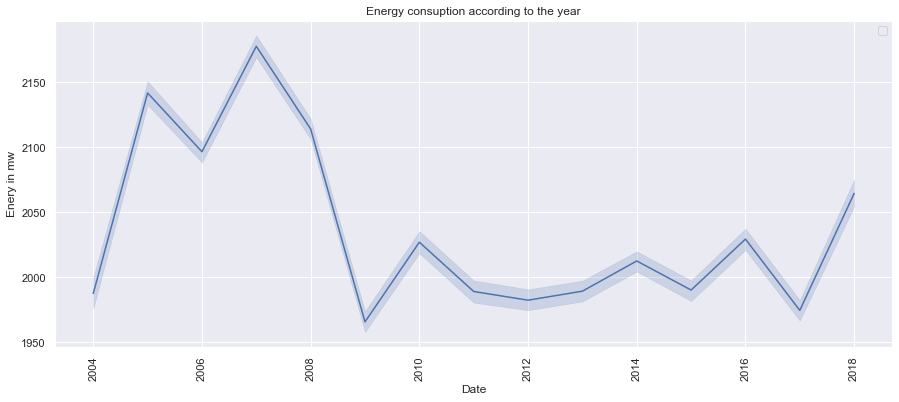

In [11]:
from matplotlib import style
fig= plt.figure()
axl = plt.subplot2grid((1,1),(0,0))
style.use('ggplot')

sns.lineplot(x=dataset["Year"], y= dataset["MegaWatt Consumption"], data = df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumption ")
plt.xlabel('Date')
plt.ylabel("Enery in mw")
plt.grid(True)
plt.legend()

for label in axl.xaxis.get_ticklabels():
    label.set_rotation(90)
    
    
plt.title("Energy consuption according to the year")


In [17]:
df.head()

,Datetime,MegaWatt Consumption,Month,Year,Date,Time,Week,Day
0,31-12-2004 01:00,1596,12,2004,2004-12-31,01:00:00,53,Friday
1,31-12-2004 02:00,1517,12,2004,2004-12-31,02:00:00,53,Friday
2,31-12-2004 03:00,1486,12,2004,2004-12-31,03:00:00,53,Friday
3,31-12-2004 04:00,1469,12,2004,2004-12-31,04:00:00,53,Friday
4,31-12-2004 05:00,1472,12,2004,2004-12-31,05:00:00,53,Friday


In [10]:
df[df["MegaWatt Consumption"]==df["MegaWatt Consumption"].max()]    #gives maximum consumption in the dataset
#df[df["MegaWatt Consumption"]==df["MegaWatt Consumption"].min()]

,Datetime,MegaWatt Consumption,Month,Year,Date,Time,Week,Day
23216,08-08-2007 15:00,3746,8,2007,2007-08-08,15:00:00,32,Wednesday


C:\Users\acer\anaconda3\envs\MyEnv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


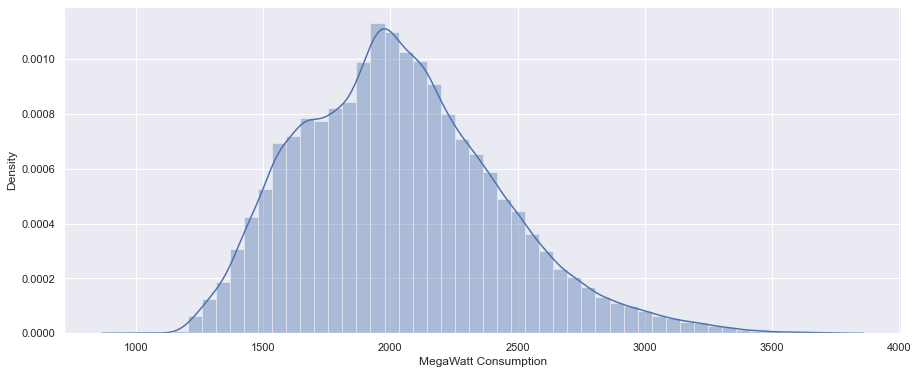

In [12]:
sns.distplot(df["MegaWatt Consumption"])

In [13]:
df[df["Year"]==2013].nunique()

Datetime                8758
MegaWatt Consumption    1635
Month                     12
Year                       1
Date                     365
Time                      24
Week                      52
Day                        7
dtype: int64

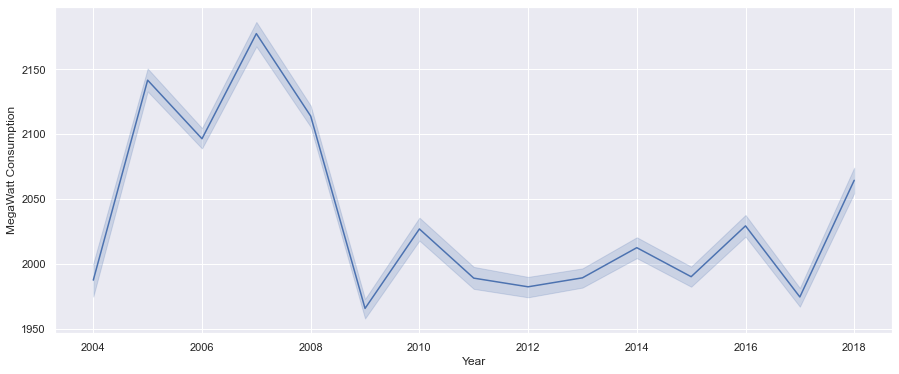

In [14]:
#energy vs year
sns.lineplot(x=df["Year"], y=df["MegaWatt Consumption"], data=df)

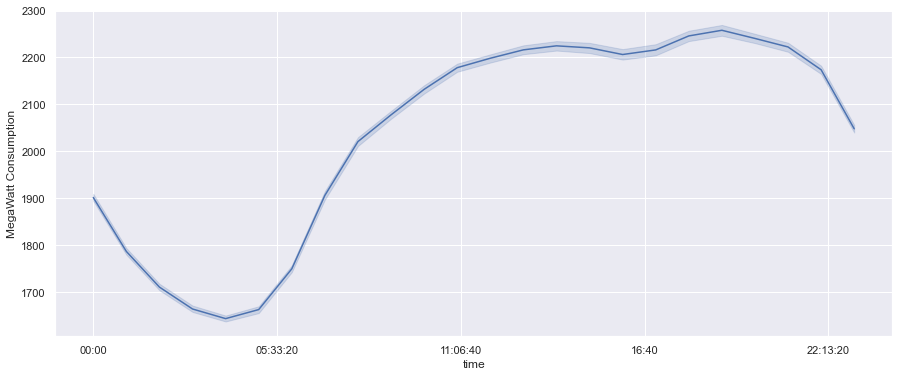

In [15]:
#energy vs day 

pd.plotting.register_matplotlib_converters()
sns.lineplot(x=df["Time"],y=df["MegaWatt Consumption"],data = df)

In [17]:
#5 cols -dataset, 2 cols df

#NewDataSet = df.resample('D').mean()
dataset.head()

,MegaWatt Consumption,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,1596,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,1517,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,1486,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,1469,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,1472,12,2004,2004-12-31,05:00:00,53,Friday


In [4]:
df1 = pd.read_csv("power_consumption.csv", index_col='Datetime', parse_dates=['Datetime'])
df1.head()

,MegaWatt Consumption
Datetime,
2004-12-31 01:00:00,1596
2004-12-31 02:00:00,1517
2004-12-31 03:00:00,1486
2004-12-31 04:00:00,1469
2004-12-31 05:00:00,1472


In [5]:
import sklearn.preprocessing
from sklearn.metrics import r2_score

def normalize_data(df1):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df1['MegaWatt Consumption']=scaler.fit_transform(df1['MegaWatt Consumption'].values.reshape(-1,1))
    return df1

df1_norm = normalize_data(df1)
df1_norm.shape

(121275, 1)

In [6]:
df1.head()

,MegaWatt Consumption
Datetime,
2004-12-31 01:00:00,0.222142
2004-12-31 02:00:00,0.193560
2004-12-31 03:00:00,0.182344
2004-12-31 04:00:00,0.176194
2004-12-31 05:00:00,0.177279


In [7]:
def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i-seq_len : i, 0])
        y_train.append(stock.iloc[i, 0])
    
    #1 last 6189 days are going to be used in test
    X_test = X_train[120000:]             
    y_test = y_train[120000:]
    
    #2 first 110000 days are going to be used in training
    X_train = X_train[:120000]           
    y_train = y_train[:120000]
    
    #3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    #4 reshape data to input into RNN models
    X_train = np.reshape(X_train, (120000, seq_len, 1))
    
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return [X_train, y_train, X_test, y_test]


In [47]:
seq_len = 20 #choose sequence length

X_train, y_train, X_test, y_test = load_data(df1, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (120000, 20, 1)
y_train.shape =  (120000,)
X_test.shape =  (1255, 20, 1)
y_test.shape =  (1255,)


In [49]:
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

lstm_model = Sequential()

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(1))

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 40)            6720      
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 40)            12960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 4

In [50]:
lstm_model.compile(optimizer="adam",loss="MSE")
lstm_model.fit(X_train, y_train, epochs=10, batch_size=1000)

Epoch 1/10
120/120 [==============================] - 24s 199ms/step - loss: 0.0212
Epoch 2/10
120/120 [==============================] - 20s 170ms/step - loss: 0.0099
Epoch 3/10
120/120 [==============================] - 21s 173ms/step - loss: 0.0053
Epoch 4/10
120/120 [==============================] - 21s 175ms/step - loss: 0.0035
Epoch 5/10
120/120 [==============================] - 22s 179ms/step - loss: 0.0026
Epoch 6/10
120/120 [==============================] - 20s 170ms/step - loss: 0.0021
Epoch 7/10
120/120 [==============================] - 20s 169ms/step - loss: 0.0019
Epoch 8/10
120/120 [==============================] - 20s 170ms/step - loss: 0.0018
Epoch 9/10
120/120 [==============================] - 20s 170ms/step - loss: 0.0016
Epoch 10/10
120/120 [==============================] - 20s 170ms/step - loss: 0.0016


In [51]:
lstm_predictions = lstm_model.predict(X_test)

lstm_score = r2_score(y_test, lstm_predictions)
print("R^2 Score of LSTM model = ",lstm_score)

R^2 Score of LSTM model =  0.9449210041677516


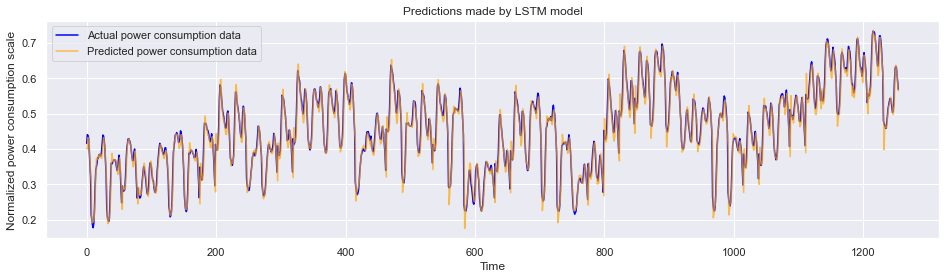

In [53]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()
    



plot_predictions(y_test, lstm_predictions, "Predictions made by LSTM model")